In [1]:
import numpy as np
import pylab as plt
import pickle
import os,sys
import pandas as pd
from collections import Counter

%matplotlib inline  
%load_ext autoreload
%autoreload 2

In [2]:
pd.set_option('display.max_rows', 10)

In [6]:
path_data = os.path.abspath(os.path.join(os.pardir,'data'))
print(path_data)

/DRIVE/REPOS/wos-text-dynamics/data


### physics-citations dataframe

this only has number of citations and year of a ut

In [7]:
fname_data = 'physics_citations.pkl'
with open(os.path.join(path_data,fname_data),'rb') as f:
    x=pickle.load(f,encoding='latin-1')


In [8]:
x

,source,year,Count
0,WOS:000170436300034,2009,1
1,WOS:000286734400001,2015,3
2,WOS:000243168500062,2007,4
3,WOS:000187183400031,2012,2
4,WOS:000239690900036,2011,1
...,...,...,...
1486898,WOS:000178624400038,2008,1
1486899,WOS:A1995TN92700049,1998,1
1486900,WOS:A1996VM97600076,2008,1
1486901,WOS:A1992KA57700009,1996,1


## Dataframe containing all info on physics (Physical Review)

this contains all the information
- wos-UT
- abstract (raw and stemmed)
- pub-type
- title
- journal
- art-type
- category (wos: heading, subheading, cat)
- references
- keywords (author-supplied)
- year

In [9]:
fname_data = 'all_pubs.pkl'
with open(os.path.join(path_data,fname_data),'rb') as f:
    x=pickle.load(f,encoding='latin-1')


In [10]:
x

,uid,abstract,abs_stemmed,abs_raw,pubtype,paper_title,source_title,doctype,heading,subheading,categories,refs,keywords,year
0,WOS:A1991GN30400003,We prove that dispersion relations similar to ...,we prove that dispers relat similar to the kra...,we prove that dispersion relations similar to ...,Journal,DISPERSION-RELATIONS AND SUM-RULES IN NONLINEA...,PHYSICAL REVIEW B,Article,Science & Technology,Physical Sciences,"[Physics, Condensed Matter]",WOS:A1976CV18300002|WOS:A1976CL53500002|WOS:A1...,constants|superconvergence|transitions,1991
1,WOS:A1991FY46300010,We derive generalizations of the semiclassical...,we deriv general of the semiclass trace formul...,we derive generalizations of the semiclassical...,Journal,SEMICLASSICAL TRACE FORMULAS IN THE PRESENCE O...,PHYSICAL REVIEW A,Article,Science & Technology,Physical Sciences,"[Optics, Physics, Atomic, Molecular & Chemical]",WOS:A1976BP76800007|WOS:A1969D527600006|WOS:A1...,periodic-orbits|quantum spectra|bound spectrum...,1991
2,WOS:A1991GE93600008,The upsilon-representability of the particle d...,the upsilonrepresent of the particl densiti fo...,the upsilon-representability of the particle d...,Journal,UPSILON-REPRESENTABILITY FOR SYSTEMS OF A FEW ...,PHYSICAL REVIEW A,Article,Science & Technology,Physical Sciences,"[Optics, Physics, Atomic, Molecular & Chemical]",WOS:A19657000000015|WOS:A19641557C00018|WOS:A1...,density-functional theory|ground-state|effecti...,1991
3,WOS:A1991GB37700004,A noncompact formulation of gauge theories on ...,a noncompact formul of gaug theori on the latt...,a noncompact formulation of gauge theories on ...,Journal,COMPACT AND NONCOMPACT GAUGE-THEORIES ON A LAT...,PHYSICAL REVIEW D,Note,Science & Technology,Physical Sciences,"[Astronomy & Astrophysics, Physics, Particles ...",000353892000006.27|WOS:A1990DQ70600011|WOS:A19...,NaN,1991
4,WOS:A1991FP08500010,Toroidally rotating saturated 2/1 and 3/1 tear...,toroid rotat satur 21 and 31 tear mode in a to...,toroidally rotating saturated 2/1 and 3/1 tear...,Journal,STABILITY OF DISRUPTION PRECURSORS IN A TOKAMA...,PHYSICAL REVIEW LETTERS,Article,Science & Technology,Physical Sciences,"[Physics, Multidisciplinary]",WOS:A1989AP23100004|WOS:A1982PH84100002|000352...,stabilization|mode,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15959,WOS:000352472400001,Tune-out wavelengths measured with an atom int...,tuneout wavelength measur with an atom interfe...,tune-out wavelengths measured with an atom int...,Journal,Atom Interferometer Gyroscope with Spin-Depend...,PHYSICAL REVIEW LETTERS,Article,Science & Technology,Physical Sciences,"[Physics, Multidisciplinary]",WOS:A1986D753900001|WOS:A1997WN07900004|WOS:A1...,matter-wave interferometry,2015
15960,WOS:000363526000006,Alpha decays in the EXO-200 detector are used ...,alpha decay in the exo200 detector are use to ...,alpha decays in the exo-200 detector are used ...,Journal,Measurements of the ion fraction and mobility ...,PHYSICAL REVIEW C,Article,Science & Technology,Physical Sciences,"[Physics, Nuclear]",WOS:A1996UM20100011|WOS:000176451500064|WOS:00...,particles|argon,2015
15961,WOS:000366100500015,"In a classical ideal plasma, a magnetic field ...",in a classic ideal plasma a magnet field is kn...,"in a classical ideal plasma , a magnetic fiel...",Journal,Effect of correlations on heat transport in a ...,PHYSICAL REVIEW E,Article,Science & Technology,Physical Sciences,"[Physics, Fluids & Plasmas, Physics, Mathemati...",WOS:A19657021700008|WOS:A1950UB81700010|WOS:A1...,one-component plasma|neutron-stars|thermal-con...,2015
15962,WOS:000363506300003,As second-generation gravitational-wave detect...,as secondgener gravitationalwav detector prepa...,as second-generation gravitational-wave detect...,Journal,Detecting Gravitation-Wave Transients at 5 sig...,PHYSICAL REVIEW LETTERS,Article,Science & Technology,Physical Sciences,"[Physics, Multidisciplinary]",WOS:000245405900041|WOS:000259014700009|WOS:00...,fallback,2015


In [48]:
list_keywords_raw = x['keywords']
list_keywords_raw

0                   constants|superconvergence|transitions
1        periodic-orbits|quantum spectra|bound spectrum...
2        density-functional theory|ground-state|effecti...
3                                                      NaN
4                                       stabilization|mode
                               ...                        
15959                           matter-wave interferometry
15960                                      particles|argon
15961    one-component plasma|neutron-stars|thermal-con...
15962                                             fallback
15963                                                  NaN
Name: keywords, dtype: object

In [51]:
list_keywords_raw= list_keywords_raw.dropna()

In [60]:
list_keywords_raw = [ keyword_ for sublist_keywords_ in list_keywords_raw for keyword_ in sublist_keywords_.split('|')]

In [61]:
c = Counter(list_keywords_raw)
set_keywords = list(c.keys())

In [59]:
set_keywords[:10]

['nonthermal radio filaments',
 '2nd-order qcd corrections',
 'sc-43',
 'd ions',
 'isotropic phase',
 'arnold tongues',
 'metastable reconstructions',
 'nj',
 'planck-scale unification',
 'moduli problem']

In [63]:
list_keywords = []
list_keywords_counts = []
for key_,val_ in c.most_common():
    list_keywords += [key_]
    list_keywords_counts += [val_]

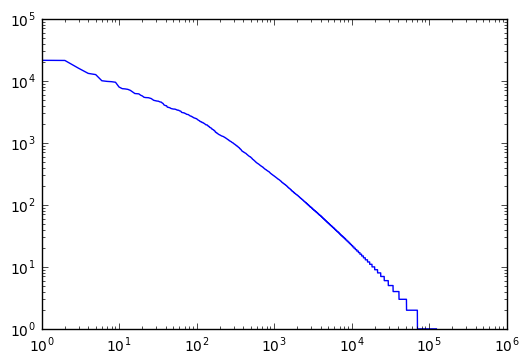

In [66]:
plt.loglog(list_keywords_counts)


In [68]:
sum(list_keywords_counts)

2145233

In [69]:
len(x)

368914

In [70]:
2145233/368914

5.814994822641591

### accessing an individual abstract

In [17]:
x0 = x.iloc[10,:]

In [18]:
print(x0)

uid                                          WOS:A1991FV18400064
abstract       In this paper, we study cooperative two-photon...
abs_stemmed    in this paper we studi cooper twophoton transi...
abs_raw        in this paper ,  we study cooperative two-phot...
pubtype                                                  Journal
                                     ...                        
subheading                                     Physical Sciences
categories       [Optics, Physics, Atomic, Molecular & Chemical]
refs           WOS:A1974S913500006|WOS:A1954UB47200018|WOS:A1...
keywords                                        system|radiation
year                                                        1991
Name: 10, dtype: object


In [19]:
x0['abstract']

'In this paper, we study cooperative two-photon transitions in a system of two (nonoverlapping) atoms for two processes:  two-photon spontaneous emission and two-photon resonance fluorescence.  Expressions are obtained for the energy shifts and decay rates due to the interaction of the atoms with and via the field.  The altered decay rates signal the existence of superradiance and subradiance in the two-atom system.  The energy shifts of the single-excitation states are found to be proportional to R-6 for small atomic separations R, and to R-2 for large separations.'

In [20]:
x0['abs_raw']

'in this paper ,  we study cooperative two-photon transitions in a system of two  ( nonoverlapping )  atoms for two processes :   two-photon spontaneous emission and two-photon resonance fluorescence .   expressions are obtained for the energy shifts and decay rates due to the interaction of the atoms with and via the field .   the altered decay rates signal the existence of superradiance and subradiance in the two-atom system .   the energy shifts of the single-excitation states are found to be proportional to r-6 for small atomic separations r ,  and to r-2 for large separations .'

In [21]:
x0['abs_stemmed']

'in this paper we studi cooper twophoton transit in a system of two nonoverlap atom for two process twophoton spontan emiss and twophoton reson fluoresc express are obtain for the energi shift and decay rate due to the interact of the atom with and via the field the alter decay rate signal the exist of superradi and subradi in the twoatom system the energi shift of the singleexcit state are found to be proport to r6 for small atom separ r and to r2 for larg separ'